In [1]:
from nltk.probability import FreqDist
import re
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings("ignore")

In [2]:
#https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/52557
#https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda
#https://www.kaggle.com/jagangupta/lessons-from-toxic-blending-is-the-new-sexy/notebook
#https://towardsdatascience.com/word-embedding-with-word2vec-and-fasttext-a209c1d3e12c

In [3]:
def is_non_ascii(s, th=0): return sum([ord(i)>128 for i in s])/float(len(s)) > th
def ratio_non_ascii(s): return sum([ord(i)>128 for i in s])/float(len(s)) 
def count_non_ascii(s): return sum([ord(i)>128 for i in s]) 
def flatten(l): return [item for sublist in l for item in sublist]
def unique_ratio(text): return len(set(text.lower().split())) / (len(text.lower().split())+1) 
def caps_ratio(text): return sum([x.isupper() for x in text]) / len(text)   
def words_in_set(text, set_): return len([w for w in text.split() if w in set_])

In [4]:
data = pd.read_csv('data/train.csv')
types = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data['total'] = data[types].sum(axis=1)
data['is_toxic'] = data['total'] > 0 
data['ratio_unique'] = data['comment_text'].apply(unique_ratio)
data['ratio_caps'] = data['comment_text'].apply(caps_ratio)

data['word_count'] = data['comment_text'].apply(lambda x: len(x.split(' ')))
data['char_count'] = data['comment_text'].astype(str).apply(lambda x: len(x)) 
data_toxic = data[(data['total'] > 0)]
data_clean = data[(data['total'] == 0)]

In [5]:
types_num = []
for t in types:
    types_num.append(data_toxic[t].value_counts()[1])

In [16]:
non_toxic_ = len(data[data['total'] == 0])
toxic_ = len(data[data['total'] > 0])
print('Number of non-toxic comments: {}'.format(non_toxic_))
print('Number of toxic comments: {}'.format(toxic_))
print('Percentage: {}'.format(toxic_/non_toxic_))

Number of non-toxic comments: 143346
Number of toxic comments: 16225
Percentage: 0.1131876717871444


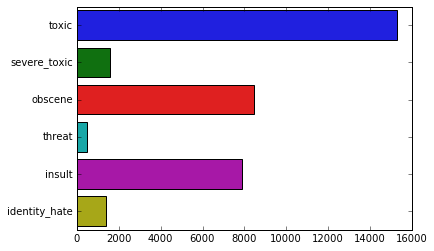

In [7]:
sns.barplot(x=types_num, y=types);

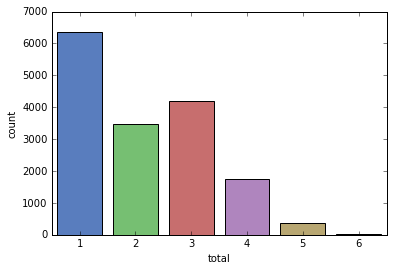

In [8]:
sns.countplot(x='total', data=data_toxic, palette='muted');

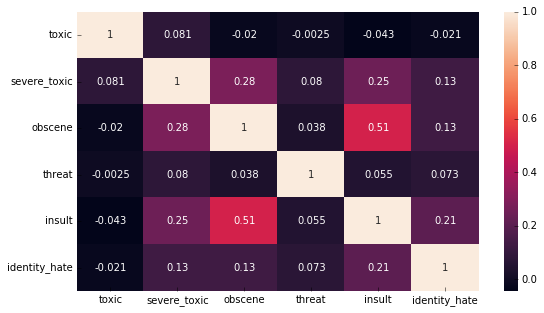

In [9]:
corr = data_toxic[types].corr()

plt.figure(figsize=(9,5))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

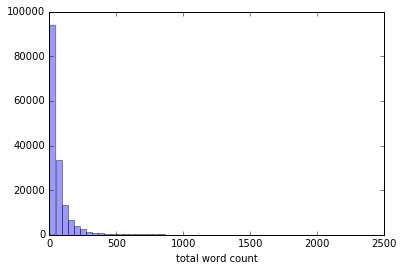

In [10]:
sns.distplot(data['word_count'], axlabel='total word count', kde=False);

In [14]:
more150 = data[data['word_count'] > 150]
toxic150 = more150[more150['total'] > 0]
print('There is {} cases with lenght more than 150 words'.format(len(more150)))
print('{} ({}) of them are toxic'.format(len(toxic150), len(toxic150)/len(more150)))

There is 16302 cases with lenght more than 150 words
1034 (0.06342780026990553) of them are toxic


In [17]:
more200 = data[data['word_count'] > 200]
toxic200 = more200[more200['total'] > 0]
print('There is {} cases with lenght more than 200 words'.format(len(more200)))
print('{} ({}) of them are toxic'.format(len(toxic200), len(toxic200)/len(more200)))

There is 10195 cases with lenght more than 200 words
676 (0.06630701324178519) of them are toxic


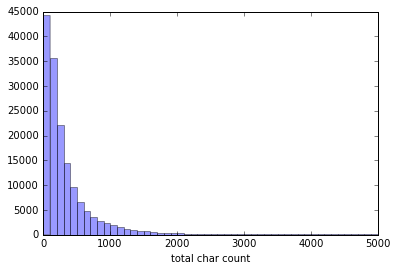

In [58]:
sns.distplot(data['char_count'], axlabel='total char count', kde=False);

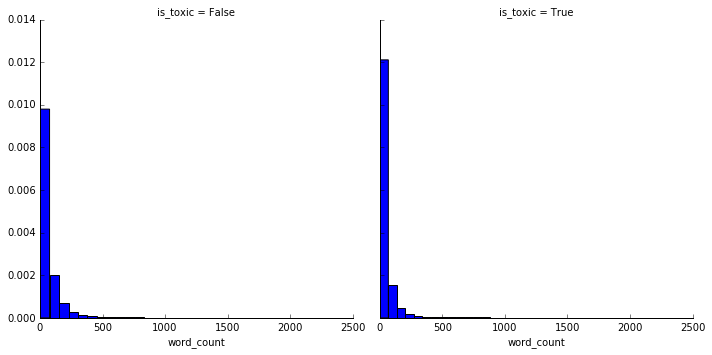

In [13]:
g = sns.FacetGrid(data, col='is_toxic', size=5)
g.map(plt.hist, 'word_count', bins=30, normed=True);

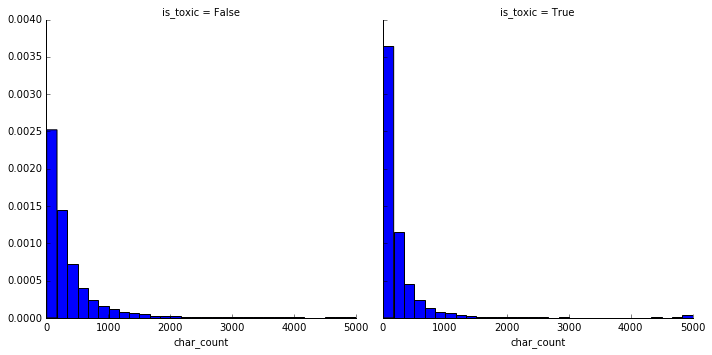

In [14]:
g = sns.FacetGrid(data, col='is_toxic', size=5)
g.map(plt.hist, 'char_count', bins=30, normed=True);

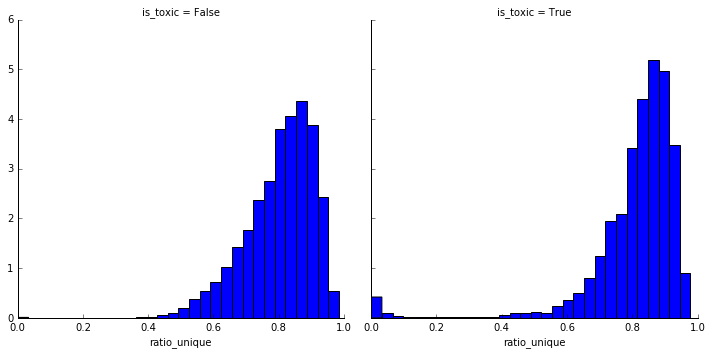

In [25]:
g = sns.FacetGrid(data, col='is_toxic', size=5)
g.map(plt.hist, 'ratio_unique', bins=30, normed=True);

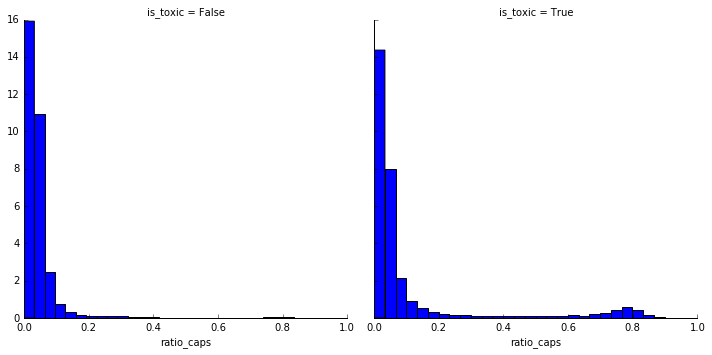

In [54]:
g = sns.FacetGrid(data, col='is_toxic', size=5)
g.map(plt.hist, 'ratio_caps', bins=30, normed=True);

In [17]:
all_sent = ' '.join(data['comment_text']).lower().split()
n_words = len(set(all_sent))
print('Number of unique words before cleaning and tokenization: {}'.format(n_words))

Number of unique words before cleaning and tokenization: 470340


In [45]:
data['nonAscii'] = data['comment_text'].apply(is_non_ascii)

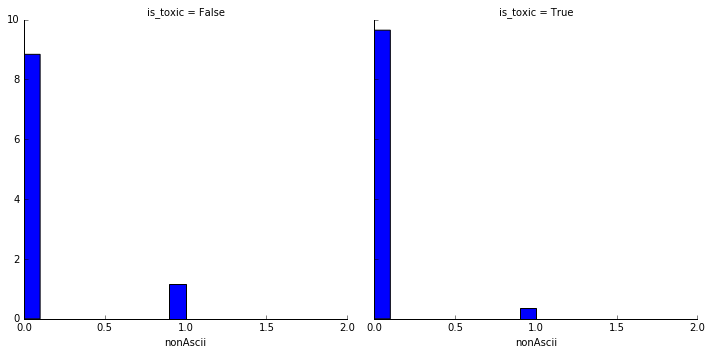

In [51]:
g = sns.FacetGrid(data, col='is_toxic', size=5, xlim=(0,2))
g.map(plt.hist, 'nonAscii', bins=10, normed=True);

In [306]:
ip = r'[\d]+(?:\.[\d]+){3}'
data['ip']=data['comment_text'].apply(lambda x: re.findall(ip,x))
ips = list(set(flatten(data['ip'])))
print('Number of unique ips: {0}'.format(len(ips)))

Number of unique ips: 5820


In [307]:
url = r'http\:[^\s]+'
data['url']=data['comment_text'].apply(lambda x: re.findall(url,x))
urls = list(set(flatten(data['url'])))
print('Number of unique urls: {0}'.format(len(urls)))

Number of unique urls: 6193


In [308]:
digit = r'[\d]+'
data['digits']=data['comment_text'].apply(lambda x: re.findall(digit,x))
digits = list(set(flatten(data['digits'])))
print('Number of unique digit tokens: {0}'.format(len(digits))) 

Number of unique digit tokens: 6569


In [309]:
user = r'[Uu]ser\:[^\s]+'
data['users']=data['comment_text'].apply(lambda x: re.findall(user,str(x)))
users = list(set(flatten(data['users'])))
print('Number of unique usernames: {0}'.format(len(users)))

Number of unique usernames: 2337


**Exploration after cleaning and augmentation**

In [112]:
data = pd.read_csv('data/train_pre.csv')
data.replace(np.nan, '', regex=True, inplace=True)
types = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data['total'] = data[types].sum(axis=1)
data_toxic = data[(data['total'] > 0)]
data_clean = data[(data['total'] == 0)]

In [113]:
types_num = []
for t in types:
    types_num.append(data_toxic[t].value_counts()[1])

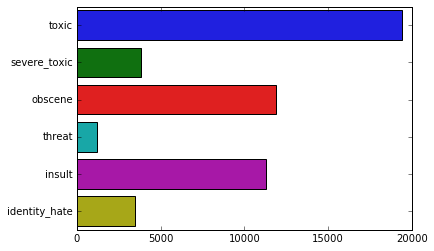

In [114]:
sns.barplot(x=types_num, y=types);

In [115]:
all_sent = ' '.join(data['tokenized_text']).lower().split()
n_words = len(set(all_sent))
print('Number of unique words after cleaning and tokenization: {}'.format(n_words))

Number of unique words after cleaning and tokenization: 221457


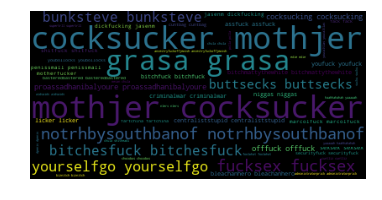

In [116]:
full_text = ' '.join(list(data['tokenized_text'].astype(str)))
toxic_text = ' '.join(list(data_toxic['tokenized_text'].astype(str)))
clean_text = ' '.join(list(data_clean['tokenized_text'].astype(str)))
set_clean = set(clean_text.split())
only_toxic = [x for x in toxic_text.split() if x not in set_clean]
only_toxic = ' '.join(only_toxic)
wordcloud = WordCloud(max_font_size=40).generate(only_toxic)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

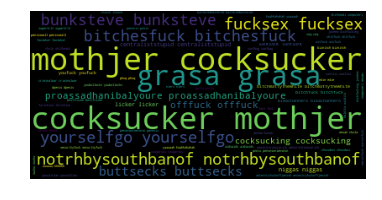

In [117]:
full_text_dedup = ' '.join(list(data['dedup_text'].astype(str)))
toxic_text_dedup = ' '.join(list(data_toxic['dedup_text'].astype(str)))
clean_text_dedup = ' '.join(list(data_clean['dedup_text'].astype(str)))
set_clean_dedup = set(clean_text.split())
only_toxic_dedup = [x for x in toxic_text.split() if x not in set_clean]
only_toxic_dedup = ' '.join(only_toxic)
wordcloud_dedup = WordCloud(max_font_size=40).generate(only_toxic)
plt.figure()
plt.imshow(wordcloud_dedup, interpolation='bilinear')
plt.axis('off')
plt.show()

In [118]:
total_n = len(full_text.split())
freq = FreqDist(full_text.split())

In [119]:
y = list(range(2000,80000,1000))
cumulative_freq = [ sum( [n/total_n for _,n in freq.most_common(z)] ) for z in y]

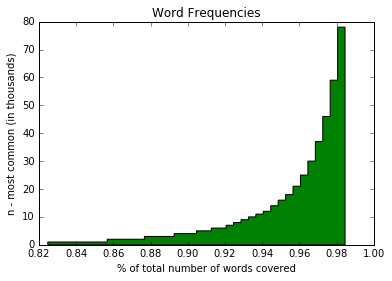

In [121]:
plt.hist(cumulative_freq, 40, histtype='stepfilled', cumulative=True, facecolor='g');
plt.title('Word Frequencies');
plt.xlabel('% of total number of words covered');
plt.ylabel('n - most common (in thousands)');

In [127]:
only_once_n = sum([y==1 for x,y in freq.most_common()])
print('Number of words with count 1: {}'.format(only_once_n))

Number of words with count 1: 127396


In [152]:
only_once = set([x for x,y in freq.most_common() if y==1])
data['once_words'] = data['dedup_text'].apply(lambda x: words_in_set(x, only_once))
data['is_toxic'] = data['total'] > 0 

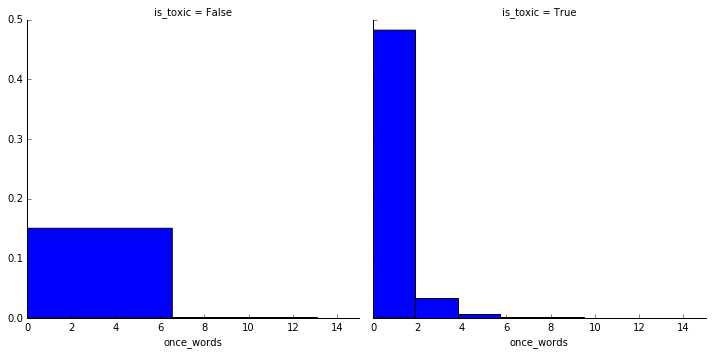

In [162]:
g = sns.FacetGrid(data, col='is_toxic', size=5, xlim=(0,15))
g.map(plt.hist, 'once_words', bins=20, normed=True);